## Implementation of multinomial Naive Bayes classifier on ‘20 Newsgroups Dataset’.

In [118]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from string import punctuation
import os
import operator
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [6]:
stopwords_lst = stopwords.words('english') + list(punctuation)
stopwords_lst += ['newsgroups', 'xref', 'path', 'from', 'subject', 'sender', 'organisation', 'apr','gmt', 'last','better',
                  'never','every','even','two','good','used','first','need','going','must','really','might','well','without','made','give',
 'look','try','far','less','seem','new','make','many','way','since','using','take','help','thanks','send','free','may',
 'see','much','want','find','would','one','like','get','use','also','could','say','us','go','please','said','set','got',
 'sure','come','lot','seems','able','anything','put', '--', '|>', '>>', '93', 'xref', 'cantaloupe.srv.cs.cmu.edu', '20', 
 '16', "max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'", '21', '19', '10', '17', '24', 'reply-to:', 
 'thu', 'nntp-posting-host:', 're:','25''18'"i'd"'>i''22''fri,''23''>the','references:','xref:','sender:','writes:','1993',
 'organization:']

folder = os.listdir('C:/Users/vipin/Downloads/20_newsgroups')  #Storing list of directories at path...
print(folder)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


* Here we are iterating over all the directories one by one
* For every directory we again iterate over all the files inside the directory
* then we read each file and see if word inside the file is also present in stopwords
    if not then we add the word inside our vocablity along with its frequency...
* lastly we are just sorting the vocalulary of words we are interested in reverse order based on their frequency.

In [7]:
vocabulary = {}
for i in range( len(folder) ):
    current_folder = os.listdir('C:/Users/vipin/Downloads/20_newsgroups/' + folder[i])
    
    for j in range( len(current_folder) ):
        filePath = 'C:/Users/vipin/Downloads/20_newsgroups/'+ folder[i] + '/' + current_folder[j]
        data = open(filePath, 'r').read()
        for word in data.split():
            if word.lower() not in stopwords_lst:
                if word.lower() not in vocabulary:
                    vocabulary[word.lower()] = 1
                else:
                    vocabulary[word.lower()] = vocabulary[word.lower()] + 1

sorted_vocabulary = sorted(vocabulary.items(), key=operator.itemgetter(1), reverse = True)

* We are considering the most frequent 1000 words as features
* We then create the dataframe which columns headers as most frequent words of our vocabulary

In [9]:
sorted_vocabulary = sorted_vocabulary[0:1000] #taking slice of first 1k frequent words for featureset

X = []
for i in range(len(sorted_vocabulary)):
    X.append( sorted_vocabulary[i][0] )
dataset = pd.DataFrame(columns=X)
dataset.head()


,subject:,from:,date:,newsgroups:,message-id:,lines:,path:,article,people,university,...,applications,internal,lord,weapons,wondering,belief,->,oil,stephanopoulos:,base


* Now we start filling the frequencies in Dataset that we have formed.
* We iterate over all the folders and for every folder we iterate over each file and see if word is the feature we are interested in then we just increment the count

In [10]:
for i in range(len(folder)):
    current_folder = os.listdir('C:/Users/vipin/Downloads/20_newsgroups/' + folder[i])
    
    for j in range( len(current_folder) ):
        dataset.loc[ len(dataset) ] = 0
        
        filePath = 'C:/Users/vipin/Downloads/20_newsgroups/'+ folder[i] + '/' + current_folder[j]
        data = open(filePath, 'r').read()
        for word in data.split():
            if word.lower() in X:
                dataset[word.lower()][len(dataset)-1] += 1
        

In [11]:
dataset.head()

,subject:,from:,date:,newsgroups:,message-id:,lines:,path:,article,people,university,...,applications,internal,lord,weapons,wondering,belief,->,oil,stephanopoulos:,base
0,1,1,1,1,1,1,1,0,4,3,...,0,0,0,0,0,2,0,0,0,0
1,1,1,1,1,1,1,1,3,18,0,...,0,0,0,0,0,15,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


* Now we are visiting every folder each file inside the folder, then for all files inside the folder we just store the store..which indicates the label... example if 1st folder has 1000 files then...we will have 1k entiries indicating 1 as label. this step is then performed for all the folder i.e newsgroup to obtain the labels.

In [103]:
labels= []
for i in range(len(folder)):
    current_folder = os.listdir('C:/Users/vipin/Downloads/20_newsgroups/'+folder[i])
    for j in range(len(current_folder)):
        labels.append(i)        # storing index of every newgroup for each artical in that group...
feature = dataset.values # Seperating all Xs(features)
list_of_features = list(dataset) # Column headers or all list of features

* We are creating a dictionary of dictionary for each class which will have all the feature/column headers and their respective frequency of form and total occurancies for each class as well for finding class prob
* dic = {
*    0: {X1:frequency...},
*    1: {X1:frequency...}
*}

In [133]:
def result(x_train, y_train, class_list, list_of_features):
    result = {}
    result['Total'] = len(y_train)
    y_train = np.array(y_train)

    for kth_class in class_list:
        result[kth_class] = {}
        rows_belonging_kth_class = []
        
        for i in y_train:
            if i == kth_class:
                rows_belonging_kth_class.append(True)
            else:
                rows_belonging_kth_class.append(False)

        kth_class_Features = x_train[rows_belonging_kth_class]
        labels_kth_class_Features = y_train[rows_belonging_kth_class]

        Total = 0
        N = len(list_of_features)
        for i in range(N):
            ith_feature = list_of_features[i]
            result[kth_class][ith_feature] = kth_class_Features[:,i].sum()
            Total = Total + result[kth_class][ith_feature]

        result[kth_class]['total_count'] = Total
    
    return result


* We now go to our result dictionary for given class we find the probablity..then we find the probablity of each freature given the class we also consider adding smoothing parameters as 1 and N..and then finally return the probablity..

In [134]:
def find_prob(row, result, clas, list_of_features):
    N = len(list_of_features)
    P = np.log(result[clas]['total_count']/result['Total'])
    
    for i in range(N):
        ith_feature = list_of_features[i]
        Xi_prob = np.log( (result[clas][ith_feature] + 1)/(result[clas]['total_count'] + N) )
        
        for j in range( int(row[i]) ):
            P = P + Xi_prob 
    return P

In [138]:
predictions = []
X_train, X_test, Y_train, Y_test = train_test_split(feature, labels, test_size=0.2, random_state=1)
class_list = list(np.unique(Y_test))
class_Dic = result(X_train, Y_train, class_list,list_of_features)

for ith_row in range(len(X_test)):
    current_row = X_test[ith_row,:]
    
    
    probablity = -9999
    assigned_class = -1
    flag = True 
    
    for cls in class_list:
        if( cls == 'Total'):
            continue
        
        current_prob = find_prob(current_row, class_Dic, cls, list_of_features) # Probablity as P(Row|class)..doing it for all class..for all row
        
        # If P(Row|current-class) is higher then the existing probablity then we classify the row to current class... 
        if flag or current_prob > probablity: 
            probablity = current_prob
            assigned_class = cls
            
        flag = False
    # Finaly appending the class label of highest probablity for ith_row...follow the loop again for next row and append again..
    predictions.append(assigned_class)
        

Accuracy Score:  81.23 %


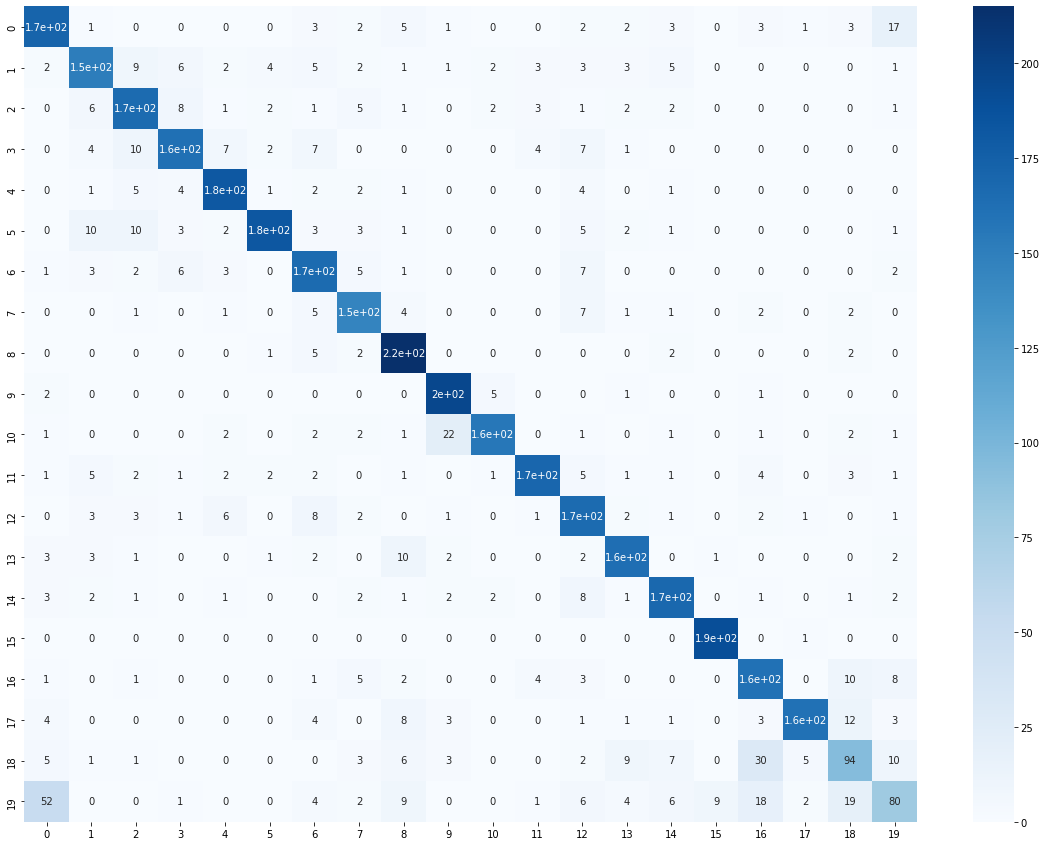

In [144]:
import matplotlib.pyplot as plt
cMatrix = confusion_matrix(Y_test, predictions)
score = accuracy_score(Y_test, predictions)
print("Accuracy Score: ", round(score*100, 2) ,'%')

plt.figure(figsize=(20, 15))
sns.heatmap(cMatrix, annot=True, cmap='Blues')
plt.show()

* references
* https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
* https://pythonspot.com/nltk-stop-words/
* https://stackoverflow.com/questions/49882682/how-do-i-list-folder-in-directory
